In [75]:
import pandas as pd
import numpy as np 
import sqlite3
import matplotlib.pyplot as plt 

#### 1. connect to database

In [5]:
con = sqlite3.connect('../../database/database.db')

In [36]:
# get the conversation from conversation table
conversation = pd.read_sql_query("""
    SELECT airline_name, conversation_opener, id_1, id_2, id_3, id_4, id_5, id_6, id_7
    FROM conversation
""", con)

# change the datatype
conversation = conversation.astype({
    'id_1' : 'float64',
    'id_2' : 'float64',
    'id_3' : 'float64',
    'id_4' : 'float64',
    'id_5' : 'float64',
    'id_6' : 'float64',
    'id_7' : 'float64'
}) 

#### 2. Count length

In [37]:
# define a function to count length of conversation 
lst = []
for index, row in conversation.drop(columns=['airline_name', 'conversation_opener']).iterrows():
    lst.append(len(row.dropna()))

In [38]:
conversation['len'] = lst # add attribute length of conversation

In [39]:
conversation = conversation.drop(columns=['id_1', 'id_2', "id_3", 'id_4', 'id_5', 'id_6', 'id_7']) # drop useless columns 

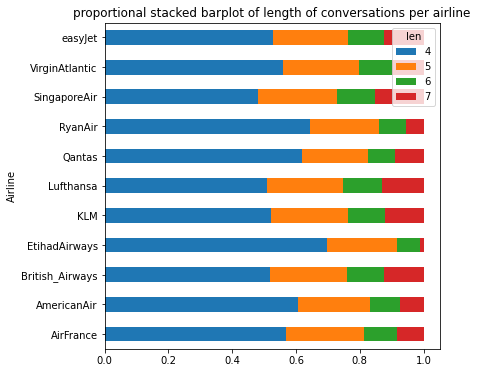

In [67]:
cross_tab_prop = pd.crosstab(index=conversation['airline_name'],
                             columns=conversation['len'],
                             normalize="index")

ax = cross_tab_prop.plot(kind='barh', 
                    stacked=True,  
                    figsize=(6, 6))
ax.set_title('proportional stacked barplot of length of conversations per airline', size=12)
ax.set_xlabel('', size=10)
ax.set_ylabel('Airline', size=10);

In [53]:
bru = conversation.groupby(['airline_name']).mean()
bru

,len
airline_name,
AirFrance,4.702797
AmericanAir,4.635114
British_Airways,4.849239
EtihadAirways,4.398734
KLM,4.836634
Lufthansa,4.872571
Qantas,4.640893
RyanAir,4.549572
SingaporeAir,4.943228


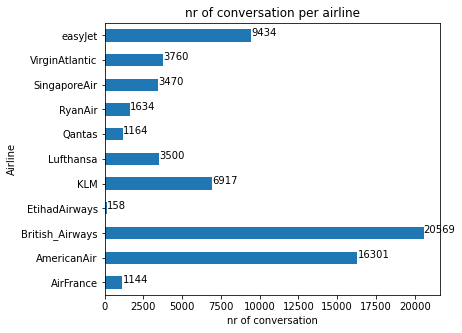

In [84]:
# number of conversation per airline - same as Marfa did 
fig, ax = plt.subplots()
conversation.groupby('airline_name', as_index=False).count().plot(kind='barh', y='len', x='airline_name', figsize=(6, 5), ax=ax)
ax.set_title('nr of conversation per airline', size=12)
ax.set_xlabel('nr of conversation', size=10)
ax.set_ylabel('Airline', size=10)
ax.get_legend().remove()
for i, v in enumerate(conversation.groupby('airline_name', as_index=False).count()['len']):
    ax.text(v, i, str(v), color='black')